# Coursera Capstone Project

## The Battle of Neighborhoods - Final Report (Week 1)

## Cristina M. B.


### Upload Libraries Required

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/cris/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h578d9bd_0         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographicli

### Content

1.	Introduction Section : 
	
    1.1 Discussion of the "backgroung situation" leading to the problem at hand:
    
    1.2 Problem to be resolved
    
    1.3 Audience for this project.
    
    
2.	Data Section:  

	2.1 Data of Current Situation (current residence place)
    
    2.2 Data required to resolve the problem
    
    2.3 Data sources and data manipulation
    

# 1.	Introduction Section : 
### Discussion of the business problem and the audience who would be interested in this project.


### 1.1 Scenario and  Background

I am a data scientist currently residing in the Eixample (Barcelona - Spain). 
I currently live within walking distance to Sagrada Familia "Sant Pau | Dos de Maig metro station" therefore I have access to good public transportation to work. Likewise, I enjoy many ammenities in the neighborhood , such as international cousine restaurants, cafes, food shops and entertainment.
I have been offered a great opportunity to work in Madrid, Spain. Although, I am very excited about it, I am a bit stress toward the process to secure a comparable place to live in Madrid. Therefore, I decided to apply the learned skills during the Coursera course to explore ways to make sure my decision is factual and rewarding.
Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it rewarding doing it myself with learned tools.   

### 1.2  Problem to be resolved:   

The challenge to resolve is being able to find a rental apartment unit in Madrid Spain that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a renta unit subject to the following conditions: 
- Apartment with monthly rent not to exceed 950 €/month
- Unit located within walking distance (1 km) from a subway metro station in Madrid
- Area with ammenities and venues similar to the ones described for current location ( See item 2.1)

### 1.3 Interested Audience
I believe this is a relevant project for a person or entity considering moving to a major city in Europe, US or Asia, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.


# 2. Data Section:
### Description of the data and its sources that will be used to solve the problem

### 2.1 Data of Current Situation
I Currently reside in the neighborhood of 'Sagrada Familia' in Eixample Barcelona. 
I use Foursquare to identify the venues around the area of residence which are then shown in the Barcelona map shown in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location in Madrid, Spain.

### 2.2 Data Required to resolve the problem
In order to make a good choice of a similar neighborhood in Madrid, the following data is required:
List/Information on neighborhoods form Madrid with their Geodata (latitude and longitude).
List/Information about the subway metro stations in Madrid with geodata.
List/Information of rent prices including locations.
Venues and ammenities in the Madrid neighborhoods (e.g. top 10)
### 2.3 sources and manipulation
The list of Madrid neighborhoods and rent prices by districts are obtained based on data obtained from the Madrid Open Data Platform (
<a href="https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Distritos-en-cifras/?vgnextfmt=default&vgnextchannel=27002d05cb71b310VgnVCM1000000b205a0aRCRD">Madrid Neighborhoods info</a>).

df_neigh.head():

              COD_DIS    COD_BAR    CENTROID    Latitude    Longitude    NOMBRE

          0    17    172    (40.34088799078875, -3.688371579197298)    40.3409    -3.68837    San Cristobal

          1    17    173    (40.33711488700938, -3.676254238025643)    40.3371 	-3.67625 	Butarque

          2    17    175    (40.35579042948162, -3.699136963903404)    40.3558 	-3.69914 	Los Ángeles

          3    17    174    (40.35569711292909, -3.688489329452058)    40.3557 	-3.68849 	Los Rosales

          4    17    171    (40.34144808026994, -3.708948525264152)    40.3414 	-3.70895 	Villaverde Alto, Casco

prices.head():

          COD_DIS 	NOM_DIS 	date 	month 	year 	price

          0 	1 	Centro 	Nov 01 2020 	11 	2020 	17.1

          1 	1 	Centro 	Oct 01 2020 	10 	2020 	17.5

          2 	1 	Centro 	Sep 01 2020 	9 	2020 	17.8

          3 	1 	Centro 	Aug 01 2020 	8 	2020 	17.9

          4 	1 	Centro 	Jul 01 2020 	7 	2020 	18.0
          
          
A list of Madrid subway metro stops was obtained based on data from the 'Consorcio de Transportes de Madrid': <a href="https://data-crtm.opendata.arcgis.com/datasets/m4-accesos/data?geometry=-4.972%2C40.238%2C-2.352%2C40.604">Madrid Metro stations</a>


metro_shp.head():

       OBJECTID 	IDACCESO 	FECHAACTUA 	MODO 	CODIGOESTA 	CODIGOACCE 	CODIGOAC_1 	DENOMINACI 	OBSERVACIO 	NIVEL 	... 	FECHAFIN 	DISTANCIAA 	X 	Y 	IDFESTACIO 	IDFVESTIBU 	coords_xy 	latitude 	longitude 	coords

      0 	1 	4_11_39 	20150709 	4 	11 	39 	011113 	Fuencarral 		0 	... 			440571.442 	4474832.969 	4_11 	4_11_22 	[[440462.0011999998, 4474625.479800001]] 	440462.0012 	4.474625e+06 	(40.42012828984801, -3.701812611628674)

      1 	2 	4_11_40 	20150709 	4 	11 	40 	011114 	Montera 		0 	... 			440582.982 	4474763.852 	4_11 	4_11_22 	[[440473.5398000004, 4474556.3618]] 	440473.5398 	4.474556e+06 	(40.41950646789212, -3.70167013920818)

      2 	3 	4_12_41 	20150709 	4 	12 	41 	011211 	Carretas 		0 	... 			440422.484 	4474447.644 	4_12 	4_12_23 	[[440313.0393000003, 4474240.1544]] 	440313.0393 	4.474240e+06 	(40.4166464264634, -3.7035322359826868)

      3 	4 	4_12_42 	20150709 	4 	12 	42 	011212 	Carmen 		0 	... 			440443.262 	4474501.791 	4_12 	4_12_23 	[[440333.8178000003, 4474294.301000001]] 	440333.8178 	4.474294e+06 	(40.41713569455122, -3.7032924156859264)

      4 	5 	4_12_43 	20150709 	4 	12 	43 	011231 	Mayor 		0 	... 			440333.351 	4474455.010 	4_12 	4_12_25 	[[440223.90699999966, 4474247.521400001]] 	440223.9070 	4.474248e+06 	(40.416706394551824, -3.7045834584598447)
     

The list of Barcelona neighborhoods are obtained based on data obtained from the Barcelona Open Data Platform (
<a href="https://opendata-ajuntament.barcelona.cat/data/es/organization/entorn-urba">Barcelona Neighborhoods info</a>).

gdf_bcn.head():

              NOMBRE 	latitude 	longitude

          11 	el Raval 	41.378999 	2.170437

          12 	el Barri Gòtic 	41.381292 	2.177312

          13 	la Barceloneta 	41.377684 	2.190148

          14 	Sant Pere_ Santa Caterina i la Ribera 	41.386795 	2.183431

          15 	el Fort Pienc 	41.397406 	2.181499

A list of Barcelona subway metro stations is obtained based on data from the developer portal of the TMB (Transports of Barcelona): <a href="https://developer.tmb.cat/data/estacions">Barcelona Metro stations</a>

gdf_metro.head():

              id 	CODI_GRUP_ESTACIO 	NOM_ESTACIO 	PICTO 	DATA 	geometry

          0 	ESTACIONS.6660111 	6660111 	Hospital de Bellvitge 	L1 	2020-12-04 	POINT (2.10724 41.34468)

          1 	ESTACIONS.6660112 	6660112 	Bellvitge 	L1 	2020-12-04 	POINT (2.11092 41.35097)

          2 	ESTACIONS.6660113 	6660113 	Av. Carrilet 	L1 	2020-12-04 	POINT (2.10264 41.35852)

          3 	ESTACIONS.6660114 	6660114 	Rambla Just Oliveras 	L1 	2020-12-04 	POINT (2.09975 41.36409)

          4 	ESTACIONS.6660115 	6660115 	Can Serra 	L1 	2020-12-04 	POINT (2.10276 41.36769)


### 2.4 How the data will be used to solve the problem
The data will be used as follows:
Use Foursquare and geopy data to map top 10 venues for all Madrid neighborhoods and clustered in groups ( as per Course LAB)
Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately.
Use Foursquare and geopy data to map top 10 venues for current Barcelona neighborhood and clustered in groups (as per Course LAB)
Compare current home location in Barcelona with Madrid neighborhoods and use prices and metro distance to find a suitable location to move in Madrid.

### 2.5 Mapping of Data
The following maps were created to facilitate the analysis and the choice of the place to live.
- Madrid map of Neighborhoods
- Madrid subway metro locations
- Madrid map of rent prices
- Madrid map of clustered venues and neighborhoods (TBD on Week 2)
- Barcelona map of Neighborhoods
- Barcelona subway metro locations
- Barcelona map of venues around current street (TBD on Week 2)

In [2]:
!pip install geojson

In [1]:
#load data from Barrios.kml
#create a dataframe with the data
import pandas as pd
import xml.etree.ElementTree as ET
import geojson
tree = ET.parse("/home/cris/Data/MAD/Barrios.kml")
root = tree.getroot()

barr = []
barrios = pd.DataFrame(columns = ['ID', 'CODDIS', 'NOMDIS', 'CODBAR', 'NOMBRE', 'coordinates','CENTROID','latitude', 'longitude',
                                 'geometry_lats', 'geometry_longs'])

ID = []
CODDIS = []
NOMDIS = []
CODBAR = []
NOMBRE = []
COORDINATES = []
PlaceMarks = tree.findall('.//{http://www.opengis.net/kml/2.2}Placemark')

for PlaceMark in PlaceMarks:
    for vals in PlaceMark:
        if vals.tag == '{http://www.opengis.net/kml/2.2}name':
            ID.append(vals.text)
    for PlaceData in PlaceMark:
        if PlaceData.tag == '{http://www.opengis.net/kml/2.2}ExtendedData':
            for ExtendedData in PlaceData:
                  if ExtendedData.tag == '{http://www.opengis.net/kml/2.2}SchemaData':
                        #print(dataR.tag, dataR.text)
                        i = 0
                        for Data in ExtendedData:
                            if Data.tag == '{http://www.opengis.net/kml/2.2}SimpleData':
                                if i == 3:
                                    CODDIS.append(Data.text)
                                if i == 4:
                                    NOMDIS.append(Data.text)                                    
                                if i == 5:
                                    CODBAR.append(Data.text)
                                if i == 8:
                                    NOMBRE.append(Data.text)
                                i = i + 1
        else:
            if PlaceData.tag == '{http://www.opengis.net/kml/2.2}LineString':      
                #lineStrings = tree.findall('.//{http://www.opengis.net/kml/2.2}LineString')
                for lineStrings in PlaceData:
                        coord_tx = ""
                        if lineStrings.tag == '{http://www.opengis.net/kml/2.2}coordinates':                            
                            COORDINATES.append(lineStrings.text)

barrios['ID'] = ID
barrios['CODDIS'] = CODDIS
barrios['NOMDIS'] = NOMDIS
barrios['CODBAR'] = CODBAR
barrios['NOMBRE'] = NOMBRE
barrios['coordinates'] = COORDINATES

barrios.head()

ID CODDIS      NOMDIS CODBAR         NOMBRE  \
0  kml_1     17  Villaverde    171     San Andrés   
1  kml_2     17  Villaverde    171     San Andrés   
2  kml_3     17  Villaverde    172  San Cristobal   
3  kml_4     17  Villaverde    172  San Cristobal   
4  kml_5     17  Villaverde    173       Butarque   

                                         coordinates CENTROID latitude  \
0  -3.69255031751288,40.3327329748109,0.0 -3.6925...      NaN      NaN   
1  -3.69296796182375,40.3458476071284,0.0 -3.6929...      NaN      NaN   
2  -3.68379091375413,40.3502149555978,0.0 -3.6837...      NaN      NaN   
3  -3.69296796182375,40.3458476071284,0.0 -3.6924...      NaN      NaN   
4  -3.68379091375413,40.3502149555978,0.0 -3.6836...      NaN      NaN   

  longitude geometry_lats geometry_longs  
0       NaN           NaN            NaN  
1       NaN           NaN            NaN  
2       NaN           NaN            NaN  
3       NaN           NaN            NaN  
4       NaN           NaN            NaN

In [2]:
!pip install shapely

In [3]:
# Create dataframe with unique Neighborhoods by CODBAR and join coordinates from several rows:
# Find the centroid of the polygons
# Just for learning purposes: The content of the shp file does not match the content of the kml file
# kml file has lines with coordinates and several rows (lines) for a neighborhood
# the shp file has a unique entry for each polygon and finally is the one that is used for creating
# the maps and the centroids of each neigborhood that will be used later on:
from shapely.geometry import Point, Polygon
import os
import geojson
import json
import folium
BAR = barrios.CODBAR.unique()
BARu = pd.DataFrame()
for k in range(0, len(BAR)):
    filter1 = barrios['CODBAR'].str.contains(BAR[k])
    BARx = barrios.where(filter1)
    BARx = BARx.dropna(subset=['CODBAR'])
    c = 0
    for item, row in BARx.iterrows():
        if c > 0:
            val = BARu.iloc[k, BARu.columns.get_loc('coordinates')]
            BARu['coordinates'][k] = val
        else:
            BARu = BARu.append(row, ignore_index = True)
        c = c + 1
        
for j in range(0, BARu.shape[0]):
    test_str = BARu['coordinates'][j].split()
    L1 = []
    for item in test_str:
        L1.append(tuple(map(float, item.split(','))))
    if len(L1) > 2:
        Poly = Polygon(L1)
        centroid = Poly.centroid.wkt 
        centroid = centroid.strip('POINT ')
        coord_cent = tuple(float(s) for s in centroid.strip('()').split())
        BARu['CENTROID'][j] = str(coord_cent)
        BARu['latitude'][j] = coord_cent[1]
        BARu['longitude'][j] = coord_cent[0]
    BARu['coordinates'][j] = L1
        
BARu.dropna(subset = ["CENTROID"], inplace=True)
BARu.head(20)

<ipython-input-3-fa7fe6b20589>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BARu['coordinates'][k] = val
<ipython-input-3-fa7fe6b20589>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BARu['CENTROID'][j] = str(coord_cent)
/home/cris/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-3-fa7fe6b20589>:41: SettingW

CENTROID CODBAR CODDIS      ID  \
0   (-3.692382528831878, 40.32602834023368)    171     17   kml_1   
1   (-3.686902710287918, 40.33963970553078)    172     17   kml_3   
2   (-3.682738807562266, 40.35570739056374)    173     17   kml_5   
3   (-3.693393760809281, 40.35635347972158)    174     17   kml_7   
4   (-3.703856489837063, 40.36827587866663)    121     12   kml_8   
5   (-3.728102792594974, 40.37362018868426)    116     11  kml_11   
6   (-3.653185987065763, 40.37603187886067)    131     13  kml_12   
7   (-3.745365761004323, 40.37417313894274)    115     11  kml_13   
8    (-3.701694190890513, 40.3757713509958)    122     12  kml_14   
9   (-3.753831417736014, 40.37731471746606)    114     11  kml_15   
10  (-3.608144740482258, 40.37799401786491)    181     18  kml_16   
11  (-3.653344689088616, 40.37836434836818)    133     13  kml_18   
12  (-3.701673586453587, 40.37984060331079)    124     12  kml_19   
13  (-3.798303694482422, 40.37337174997912)    105     10  kml_20   
14   (-3.77671991184164, 40.37645514337171)    106     10  kml_21   
15  (-3.711675110169878, 40.38166901923449)    126     12  kml_25   
16   (-3.720171977206937, 40.3852517785863)    112     11  kml_26   
17  (-3.715451731968913, 40.38520643835943)    125     12  kml_27   
19  (-3.768822541987366, 40.39175785999251)    104     10  kml_38   
20   (-3.736682084380179, 40.3908551970544)    113     11  kml_39   

                         NOMBRE              NOMDIS  \
0                    San Andrés          Villaverde   
1                 San Cristobal          Villaverde   
2                      Butarque          Villaverde   
3                   Los Rosales          Villaverde   
4                     Orcasitas               Usera   
5                    Buenavista         Carabanchel   
6                     Entrevías  Puente de Vallecas   
7                 Puerta Bonita         Carabanchel   
8                       Orcasur               Usera   
9                  Vista Alegre         Carabanchel   
10  Casco Histórico de Vallecas   Villa de Vallecas   
11              Palomeras Bajas  Puente de Vallecas   
12                  Almendrales               Usera   
13                   Campamento              Latina   
14               Cuatro Vientos              Latina   
15                        Zofío               Usera   
16                       Opañel         Carabanchel   
17                     Moscardó               Usera   
19                       Aluche              Latina   
20                   San Isidro         Carabanchel   

                                          coordinates  geometry_lats  \
0   [(-3.69255031751288, 40.3327329748109, 0.0), (...            NaN   
1   [(-3.68379091375413, 40.3502149555978, 0.0), (...            NaN   
2   [(-3.68379091375413, 40.3502149555978, 0.0), (...            NaN   
3   [(-3.69296796182375, 40.3458476071284, 0.0), (...            NaN   
4   [(-3.70345290207178, 40.3711566911761, 0.0), (...            NaN   
5   [(-3.73644220097911, 40.3738578518829, 0.0), (...            NaN   
6   [(-3.65438425624249, 40.3760307063046, 0.0), (...            NaN   
7   [(-3.73644220097911, 40.3738578518829, 0.0), (...            NaN   
8   [(-3.70345290207178, 40.3711566911761, 0.0), (...            NaN   
9   [(-3.75079138165851, 40.3758268755965, 0.0), (...            NaN   
10  [(-3.61837160308251, 40.3807914221195, 0.0), (...            NaN   
11  [(-3.65288355894768, 40.3814242941467, 0.0), (...            NaN   
12  [(-3.70008955801554, 40.3785318656481, 0.0), (...            NaN   
13  [(-3.78769845447556, 40.3816739652568, 0.0), (...            NaN   
14  [(-3.78769845447556, 40.3816739652568, 0.0), (...            NaN   
15  [(-3.71183705513692, 40.3851344376055, 0.0), (...            NaN   
16  [(-3.71755563759179, 40.3852808375407, 0.0), (...            NaN   
17  [(-3.71183705513692, 40.3851344376055, 0.0), (...            NaN   
19  [(-3.75930607040948, 40.3836300733815, 0.0), (...        

In [6]:
!pip install geopandas

     |████████████████████████████████| 962 kB 12 kB/s eta 0:00:011
     |████████████████████████████████| 14.7 MB 62 kB/s eta 0:00:014     |█████████▊                      | 4.5 MB 32 kB/s eta 0:05:20
     |████████████████████████████████| 6.5 MB 60 kB/s eta 0:00:015


In [4]:
#Creates the fields geometry_lats and geometry_longs extracted from kml
#and joined in a single row by BAR_COD
import geopandas as gpd
import shapely
for n, rowB in BARu.iterrows():
    #coord_t = str(rowB['coordinates'])
    #coord_t = coord_t.replace(',0.0','')
    
    coord_t = str(rowB['coordinates'])
    coord_t = coord_t.replace(', 0.0),','')
    coord_t = coord_t.replace('(','')
    coord_t = coord_t.replace(', 0.0)','')
    coord_t = coord_t.replace(', ',',')
    coord_t = coord_t.replace('[','')
    coord_t = coord_t.replace(']','')
    lats = []
    longs = []    
    
    for s in coord_t.split():
        var = s.split(',')
        lats.append(var[1])
        longs.append(var[0])

    BARu['geometry_lats'][n] = lats
    BARu['geometry_longs'][n] = longs
BARu.head()

var = barrios['coordinates'].to_list()


<ipython-input-4-a0990685de26>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BARu['geometry_lats'][n] = lats
/home/cris/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-4-a0990685de26>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BARu['geometry_longs'][n] = longs


In [5]:
!pip install pyshp

number of neighborhoods in Madrid: 131


<ipython-input-172-fcf7fe489de9>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CENTROID'][item] = str(coord_cent)
<ipython-input-172-fcf7fe489de9>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'][item] = coord_cent[0]
<ipython-input-172-fcf7fe489de9>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'][item] = coord_cent[1]


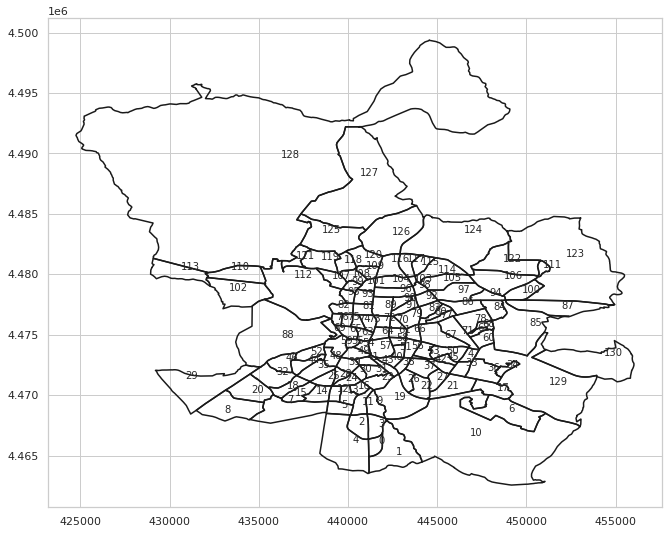

In [172]:
#load data from shp routine
#coordinates conversion
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj #import Proj, transform
from pyproj import Transformer


sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

%matplotlib inline

myshp = open("/home/cris/Data/MAD/Barrios-MAD.shp", "rb")
mydbf = open("/home/cris/Data/MAD/Barrios-MAD.dbf", "rb")
r = shp.Reader(shp=myshp, dbf=mydbf)
sf = shp.Reader("/home/cris/Data/MAD/Barrios-MAD.dbf")

sf.shapeType
print('number of neighborhoods in Madrid:', len(sf))
shapes = sf.shapes()

def read_shapefile(sf):
    #Read a shapefile into a Pandas dataframe with a 'coords' 
    #column holding the geometry information. This uses the pyshp
    #package
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)

df['coords_gps'] = '' 

def coordTrans(): 
#Once ran the result is stored into shapes.csv and the df 
    for item, row in df.iterrows():
        print('item ' + str(item) + ' of ' + str(df.shape[0]))
        coordinates = row['coords']
        coordinates_M = []
        for i in range(0, len(coordinates)):        
            x1, y1 = coordinates[i]
            transformer = Transformer.from_crs("epsg:25830", "epsg:4326")
            x2,y2 = transformer.transform(x1, y1)
            coordinates_gps = (x2, y2)
            coordinates_M.append(coordinates_gps)
        df.at[item,'coords_gps'] = coordinates_M

    df.rename(columns={"coords": "coords_xy", "coords_gps": "coords"})

def coordCentroid(df): 
#Once ran the result is stored into shapes.csv and the df
    df['CENTROID'] = ''
    df['latitude'] = ''
    df['longitude'] = ''
    for item, row in df.iterrows():       
        #test_str = df['coords'][j].split()        
        #
        textT = df['coords'][item]
        textT = textT.replace('), (', ' ')
        textT = textT.replace('[','')
        textT = textT.replace(']','')
        textT = textT.replace('(','')
        textT = textT.replace(')','')
        textT = textT.replace(', ',',')
        textT = textT.split(' ')
        textT
        coords = []
        L2 = []
        for s in textT:
            coords = []
            for s2 in s.split(','):
                coords.append(float(s2))                
                
            L2.append(tuple(coords))
            lat = coords[0]
            long = coords[1]
        if len(L2) > 2:
            Poly = Polygon(L2)
       
        centroid = Poly.centroid.wkt 
        centroid = centroid.strip('POINT ')
        coord_cent = tuple(float(s) for s in centroid.strip('()').split())
        df['CENTROID'][item] = str(coord_cent)
        df['latitude'][item] = coord_cent[0]
        df['longitude'][item] = coord_cent[1]
        
#This plot_map works for coordinates x, y
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

#once we have the coordinates conversed we load the csv file:
df = pd.read_csv('/home/cris/Data/MAD/shapes.csv')
df = df.rename(columns={"coords": "coords_xy", "coords_gps": "coords"})
coordCentroid(df)

plot_map(sf)

In [173]:
df.head()

Unnamed: 0  OBJECTID_1      NOMDIS  \
0           0           1  Villaverde   
1           1           2  Villaverde   
2           2           3  Villaverde   
3           3           4  Villaverde   
4           4           5  Villaverde   

                                           NOMBRE    Shape_Leng    Shape_Area  \
0                                   San Cristóbal   4752.827446  1.082492e+06   
1                                        Butarque  12641.916858  6.375522e+06   
2                                     Los Ángeles   5703.998815  1.935271e+06   
3                                     Los Rosales   5470.262628  1.540747e+06   
4  Villaverde Alto, Casco Histórico de Villaverde  13726.660503  9.253554e+06   

   COD_DIS  COD_DIS_TX                                      BARRIO_MAY  \
0       17          17                                   SAN CRISTOBAL   
1       17          17                                        BUTARQUE   
2       17          17                                     LOS ANGELES   
3       17          17                                     LOS ROSALES   
4       17          17  VILLAVERDE ALTO, CASCO HISTORICO DE VILLAVERDE   

   COD_DISBAR  COD_BAR  NUM_BAR  \
0         172      172        2   
1         173      173        3   
2         175      175        5   
3         174      174        4   
4         171      171        1   

                                        BARRIO_MT COD_DISB  \
0                                   SAN CRISTOBAL     17-2   
1                                        BUTARQUE     17-3   
2                                     LOS ÁNGELES     17-5   
3                                     LOS ROSALES     17-4   
4  VILLAVERDE ALTO, CASCO HISTÓRICO DE VILLAVERDE     17-1   

                                           coords_xy  \
0  [(441930.8669999996, 4466853.188999999), (4419...   
1  [(444144.85699999984, 4464473.210999999), (443...   
2  [(441147.7280000001, 4466374.482999999), (4411...   
3  [(442098.82600000035, 4468081.978), (442132.05...   
4  [(440129.2759999996, 4468362.078), (440048.481...   

                                              coords  \
0  [(40.350214958848454, -3.6837909114265264), (4...   
1  [(40.32892568851315, -3.657513632638966), (40....   
2  [(40.34584760405907, -3.6929679617869082), (40...   
3  [(40.36129631270684, -3.6819247614159774), (40...   
4  [(40.36368051975808, -3.7051455765740116), (40...   

                                  CENTROID latitude longitude  
0  (40.34088799078875, -3.688371579197298)  40.3409  -3.68837  
1  (40.33711488700938, -3.676254238025643)  40.3371  -3.67625  
2  (40.35579042948162, -3.699136963903404)  40.3558  -3.69914  
3  (40.35569711292909, -3.688489329452058)  40.3557  -3.68849  
4  (40.34144808026994, -3.708948525264152)  40.3414  -3.70895

In [177]:
#Create map with centroids by neighborhoods in Madrid
import os
import geojson
import json
import folium

def data2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Point((X["longitude"],
                                                    X["latitude"],
                                                    0)),
                            properties=dict(name=X["name"],
                                            description=X["description"])))
    df.apply(insert_features, axis=1)
    with open('/home/cris/Data/MAD/map_metro.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

#Create GeoJson for Folium map based on information from kml
#data2geojson(BARu)

with open('/home/cris/Data/MAD/map1.geojson') as access_json:
    read_content = json.load(access_json)

feature_access = read_content['features']

# Creating Folium Map
meanLat = BARu['latitude'].mean()
meanLong = BARu['longitude'].mean()
m_districts = folium.Map(location=[meanLat, meanLong], zoom_start=12)
nodeData = os.path.join('map1.geojson')
geo_json = folium.GeoJson(nodeData)

#add markers
for i, rec in df.iterrows():
    centroid_txt = rec['CENTROID']
    loc = tuple((float(rec['latitude']), float(rec['longitude'])))
    folium.Marker(location=(rec['latitude'], rec['longitude']),
                  popup = rec['NOMBRE']).add_to(m_districts)
    
geo_json.add_to(m_districts)
m_districts

In [170]:
BARu[['CODDIS','CODBAR', 'CENTROID', 'latitude', 'longitude', 'NOMBRE']]

CODDIS                 CODBAR  \
0                       17                    171   
1                       17                    172   
2                       17                    173   
3                       17                    174   
4                       12                    121   
..                     ...                    ...   
122               Chamberí               Chamberí   
123          Ciudad Lineal          Ciudad Lineal   
124  San Blas - Canillejas  San Blas - Canillejas   
125              Hortaleza              Hortaleza   
126  Fuencarral - El Pardo  Fuencarral - El Pardo   

                                    CENTROID   latitude  longitude  \
0    (-3.692382528831878, 40.32602834023368)  40.326028  -3.692383   
1    (-3.686902710287918, 40.33963970553078)  40.339640  -3.686903   
2    (-3.682738807562266, 40.35570739056374)  40.355707  -3.682739   
3    (-3.693393760809281, 40.35635347972158)  40.356353  -3.693394   
4    (-3.703856489837063, 40.36827587866663)  40.368276  -3.703856   
..                                       ...        ...        ...   
122  (-3.714916249061155, 40.44085874888523)  40.440859  -3.714916   
123   (-3.63750155641011, 40.43748388799573)  40.437484  -3.637502   
124  (-3.565553132627514, 40.44917509701223)  40.449175  -3.565553   
125   (-3.629925825022692, 40.4493097289977)  40.449310  -3.629926   
126   (-3.75553966672357, 40.47169135358337)  40.471691  -3.755540   

            NOMBRE  
0       San Andrés  
1    San Cristobal  
2         Butarque  
3      Los Rosales  
4        Orcasitas  
..             ...  
122              0  
123              0  
124              0  
125              0  
126              0  

[122 rows x 6 columns]

In [213]:
df_neigh = df[['COD_DIS', 'COD_BAR', 'CENTROID', 'latitude', 'longitude', 'NOMBRE']]
df_neigh.head()

COD_DIS  COD_BAR                                 CENTROID latitude  \
0       17      172  (40.34088799078875, -3.688371579197298)  40.3409   
1       17      173  (40.33711488700938, -3.676254238025643)  40.3371   
2       17      175  (40.35579042948162, -3.699136963903404)  40.3558   
3       17      174  (40.35569711292909, -3.688489329452058)  40.3557   
4       17      171  (40.34144808026994, -3.708948525264152)  40.3414   

  longitude                                          NOMBRE  
0  -3.68837                                   San Cristóbal  
1  -3.67625                                        Butarque  
2  -3.69914                                     Los Ángeles  
3  -3.68849                                     Los Rosales  
4  -3.70895  Villaverde Alto, Casco Histórico de Villaverde

In [207]:
#Create the gjson with the poligons with data from df --> shp file
#def data2geojson_polygons(df):
coordsTot = []
features2 = []
Tot = []
for n, X in df.iterrows():
    coord_tx = df['coords'][n]
    coord_tx = coord_tx.replace('[','')
    coord_tx = coord_tx.replace(']','')
    coord_tx = coord_tx.replace('), (',') (')
    coord_tx = coord_tx.replace(', ',',')
    coord_tx = coord_tx.replace('(','')
    coord_tx = coord_tx.replace(')','')
    #coord_tx = coord_tx.split(' ')
    coord_tx
    coordsM = []
    #coords = tuple(float(s.split(','))
    for s in coord_tx.split(' '):
        #print(s)
        i = 0
        for m in s.split(','):
            if i == 0:
                coords1 = float(m)
                i = i + 1
            else:
                coords2 = float(m)
                coords = (coords2, coords1)
                coordsM.append(coords)

    Tot.append(coordsM)
    poly = Polygon(coordsM)
    dict1 = dict(name=X["COD_BAR"], description=X["BARRIO_MAY"])
    feature = geojson.Feature(geometry = poly, properties = dict1)
    features2.append(feature)

with open('/home/cris/Data/MAD/mapMAD.geojson', 'w', encoding='utf8') as fp:
    geojson.dump(geojson.FeatureCollection(features2), fp, sort_keys=True, ensure_ascii=False)

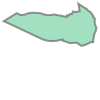

In [208]:
poly

In [211]:
#Using geojson previously created with polygons:
import json
import geopandas

barrios_geojson = geopandas.read_file('/home/cris/Data/MAD/mapMAD.geojson')

geo_json1 = folium.GeoJson(barrios_geojson)

# Creating Folium Map
meanLat = BARu['latitude'].mean()
meanLong = BARu['longitude'].mean()
m_neighborhoods = folium.Map(location=[meanLat, meanLong], zoom_start=10)

geo_json1.add_to(m_neighborhoods)

#add markers
for i, rec in df.iterrows():
    centroid_txt = rec['CENTROID']
    #loc = tuple(float(s) for s in centroid_txt.strip('()').split(','))
    loc = tuple((float(rec['latitude']), float(rec['longitude'])))
    #print(str(df['CENTROID'][i]))
    folium.Marker(location=(rec['latitude'], rec['longitude']),
                  popup = rec['NOMBRE']).add_to(m_neighborhoods)
    
m_neighborhoods

In [205]:
barrios_geojson = geopandas.read_file('/home/cris/Data/MAD/mapMAD.geojson')
barrios_geojson

description  name  \
0                                     SAN CRISTOBAL   172   
1                                          BUTARQUE   173   
2                                       LOS ANGELES   175   
3                                       LOS ROSALES   174   
4    VILLAVERDE ALTO, CASCO HISTORICO DE VILLAVERDE   171   
..                                              ...   ...   
126                                        VALVERDE    86   
127                                       EL GOLOSO    88   
128                                        EL PARDO    81   
129                    CASCO HISTORICO DE VICALVARO   191   
130                                    EL CAÑAVERAL   194   

                                              geometry  
0    POLYGON ((40.35021 -3.68379, 40.34888 -3.68379...  
1    POLYGON ((40.32893 -3.65751, 40.32786 -3.65991...  
2    POLYGON ((40.34585 -3.69297, 40.34579 -3.69339...  
3    POLYGON ((40.36130 -3.68193, 40.36022 -3.68152...  
4    POLYGON ((40.36368 -3.70515, 40.35983 -3.70606...  
..                                                 ...  
126  POLYGON ((40.51167 -3.65860, 40.51146 -3.65788...  
127  POLYGON ((40.57853 -3.70159, 40.57832 -3.70159...  
128  POLYGON ((40.64328 -3.65568, 40.64323 -3.65541...  
129  POLYGON ((40.36376 -3.55562, 40.36374 -3.55562...  
130  POLYGON ((40.39310 -3.54270, 40.39354 -3.54262...  

[131 rows x 3 columns]

In [295]:
#Neighborhood prices - https://datos.madrid.es/portal/site/egob/
#https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Distritos-en-cifras
from datetime import datetime
prices_MAD_DIS = pd.DataFrame()
prices_MAD_DIS = pd.read_csv('/home/cris/Data/MAD/PRECIOS_DISCT_MAD.csv', sep=',', engine='python')
prices_MAD_DIS.head()
#
#transform the date columns per month into table with the foloowing 
prices = pd.DataFrame(columns=['COD_DIS', 'NOM_DIS', 'date', 'month', 'year', 'price'])
n1 = 0
nom_dis = []
cod_dis = []
dates = []
months = []
years = []
pricesT = []
for el, row in prices_MAD_DIS.iterrows():
    num = 0
    for dat in prices_MAD_DIS.columns:
        #print(row['NOM_DIS'])
        if num > 1:
            date_txt = dat
            date_price = datetime.strptime(date_txt, '%d/%m/%y')    
            month_price = date_price.month
            year_price = date_price.year
            #print(str(n1))
            #data = [{'COD_DIS':row['COD_DIS'],'NOM_DIS':row['NOM_DIS']}]
            nom_dis.append(row['NOM_DIS'])
            cod_dis.append(row['COD_DIS'])
            dates.append(date_price.strftime("%b %d %Y"))
            months.append(month_price)
            years.append(year_price)
            pricesT.append(row[date_txt])
            n1 = n1 + 1
        num = num + 1

prices = prices.assign(COD_DIS=cod_dis)
prices = prices.assign(NOM_DIS=nom_dis)
prices = prices.assign(date=dates)
prices = prices.assign(month=months)
prices = prices.assign(year=years)
prices = prices.assign(price=pricesT)
prices.head()

COD_DIS NOM_DIS         date  month  year  price
0        1  Centro  Nov 01 2020     11  2020   17.1
1        1  Centro  Oct 01 2020     10  2020   17.5
2        1  Centro  Sep 01 2020      9  2020   17.8
3        1  Centro  Aug 01 2020      8  2020   17.9
4        1  Centro  Jul 01 2020      7  2020   18.0

In [299]:
#get only the november 2020 data for the prices
filterdate = ((prices['month'] == 11) & (prices['year'] == 2020))
pricesToday = prices.where(filterdate)
pricesToday = pricesToday.dropna(subset=['COD_DIS'])
pricesToday.head()

COD_DIS     NOM_DIS         date  month    year  price
0       1.0      Centro  Nov 01 2020   11.0  2020.0   17.1
23      2.0  Arganzuela  Nov 01 2020   11.0  2020.0   14.8
46      3.0      Retiro  Nov 01 2020   11.0  2020.0   14.8
69      4.0   Salamanca  Nov 01 2020   11.0  2020.0   15.3
92      5.0   Chamartín  Nov 01 2020   11.0  2020.0   15.3

In [341]:
for_plotting = barrios_geojson.merge(df, left_on = 'name', right_on = 'COD_BAR')
for_plotting = for_plotting.merge(pricesToday, left_on = 'COD_DIS', right_on = 'COD_DIS')
for_plotting.head()

description  name  \
0                                   SAN CRISTOBAL   172   
1                                        BUTARQUE   173   
2                                     LOS ANGELES   175   
3                                     LOS ROSALES   174   
4  VILLAVERDE ALTO, CASCO HISTORICO DE VILLAVERDE   171   

                                            geometry  Unnamed: 0  OBJECTID_1  \
0  POLYGON ((-3.68379 40.35021, -3.68379 40.34888...           0           1   
1  POLYGON ((-3.65751 40.32893, -3.65991 40.32786...           1           2   
2  POLYGON ((-3.69297 40.34585, -3.69339 40.34579...           2           3   
3  POLYGON ((-3.68193 40.36130, -3.68152 40.36022...           3           4   
4  POLYGON ((-3.70515 40.36368, -3.70606 40.35983...           4           5   

       NOMDIS                                          NOMBRE    Shape_Leng  \
0  Villaverde                                   San Cristóbal   4752.827446   
1  Villaverde                                        Butarque  12641.916858   
2  Villaverde                                     Los Ángeles   5703.998815   
3  Villaverde                                     Los Rosales   5470.262628   
4  Villaverde  Villaverde Alto, Casco Histórico de Villaverde  13726.660503   

     Shape_Area  COD_DIS  ...  \
0  1.082492e+06       17  ...   
1  6.375522e+06       17  ...   
2  1.935271e+06       17  ...   
3  1.540747e+06       17  ...   
4  9.253554e+06       17  ...   

                                           coords_xy  \
0  [(441930.8669999996, 4466853.188999999), (4419...   
1  [(444144.85699999984, 4464473.210999999), (443...   
2  [(441147.7280000001, 4466374.482999999), (4411...   
3  [(442098.82600000035, 4468081.978), (442132.05...   
4  [(440129.2759999996, 4468362.078), (440048.481...   

                                              coords  \
0  [(40.350214958848454, -3.6837909114265264), (4...   
1  [(40.32892568851315, -3.657513632638966), (40....   
2  [(40.34584760405907, -3.6929679617869082), (40...   
3  [(40.36129631270684, -3.6819247614159774), (40...   
4  [(40.36368051975808, -3.7051455765740116), (40...   

                                  CENTROID  latitude  longitude     NOM_DIS  \
0  (40.34088799078875, -3.688371579197298)   40.3409   -3.68837  Villaverde   
1  (40.33711488700938, -3.676254238025643)   40.3371   -3.67625  Villaverde   
2  (40.35579042948162, -3.699136963903404)   40.3558   -3.69914  Villaverde   
3  (40.35569711292909, -3.688489329452058)   40.3557   -3.68849  Villaverde   
4  (40.34144808026994, -3.708948525264152)   40.3414   -3.70895  Villaverde   

          date month    year price  
0  Nov 01 2020  11.0  2020.0  10.8  
1  Nov 01 2020  11.0  2020.0  10.8  
2  Nov 01 2020  11.0  2020.0  10.8  
3  Nov 01 2020  11.0  2020.0  10.8  
4  Nov 01 2020  11.0  2020.0  10.8  

[5 rows x 27 columns]

In [343]:
for_plotting.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 131 entries, 0 to 130
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   description  131 non-null    object  
 1   name         131 non-null    int64   
 2   geometry     131 non-null    geometry
 3   Unnamed: 0   131 non-null    int64   
 4   OBJECTID_1   131 non-null    int64   
 5   NOMDIS       131 non-null    object  
 6   NOMBRE       131 non-null    object  
 7   Shape_Leng   131 non-null    float64 
 8   Shape_Area   131 non-null    float64 
 9   COD_DIS      131 non-null    int64   
 10  COD_DIS_TX   131 non-null    int64   
 11  BARRIO_MAY   131 non-null    object  
 12  COD_DISBAR   131 non-null    int64   
 13  COD_BAR      131 non-null    int64   
 14  NUM_BAR      131 non-null    int64   
 15  BARRIO_MT    131 non-null    object  
 16  COD_DISB     131 non-null    object  
 17  coords_xy    131 non-null    object  
 18  coords       131 non-n

In [344]:
for_plot = for_plotting[['COD_DIS', 'geometry', 'COD_BAR', 'NOM_DIS','NOMBRE', 'price']]
for_plot.set_index('COD_BAR',inplace=True)
for_plot.head()


COD_DIS                                           geometry  \
COD_BAR                                                               
172           17  POLYGON ((-3.68379 40.35021, -3.68379 40.34888...   
173           17  POLYGON ((-3.65751 40.32893, -3.65991 40.32786...   
175           17  POLYGON ((-3.69297 40.34585, -3.69339 40.34579...   
174           17  POLYGON ((-3.68193 40.36130, -3.68152 40.36022...   
171           17  POLYGON ((-3.70515 40.36368, -3.70606 40.35983...   

            NOM_DIS                                          NOMBRE  price  
COD_BAR                                                                     
172      Villaverde                                   San Cristóbal   10.8  
173      Villaverde                                        Butarque   10.8  
175      Villaverde                                     Los Ángeles   10.8  
174      Villaverde                                     Los Rosales   10.8  
171      Villaverde  Villaverde Alto, Casco Histórico de Villaverde   10.8

In [345]:
for_plot.describe()

COD_DIS       price
count  131.000000  131.000000
mean    10.694656   13.357252
std      5.891184    1.955978
min      1.000000   10.200000
25%      6.000000   11.700000
50%     11.000000   12.300000
75%     15.000000   14.800000
max     21.000000   17.100000

In [326]:
!pip install descartes

In [329]:
!pip install mapclassify

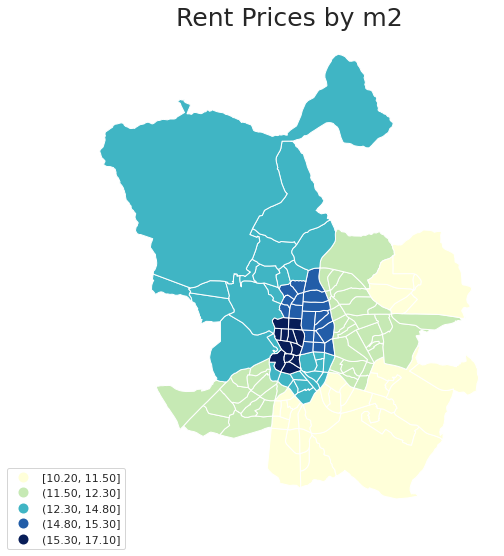

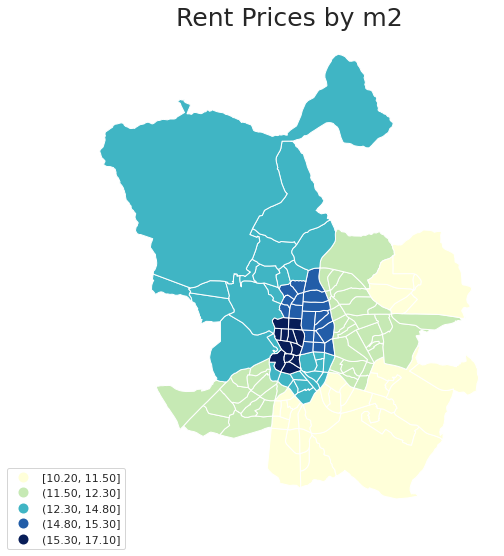

In [346]:
ax = for_plot.plot(column='price',cmap =    
                'YlGnBu', figsize=(15,9),   
                 scheme='quantiles', legend = True)
#add title to the map
ax.set_title('Rent Prices by m2', fontdict= 
            {'fontsize':25})#remove axes
ax.set_axis_off()#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.12))
ax.get_figure()

In [375]:
#Load Madrid Subway Metro station information (shp file)
metroshp = open("/home/cris/Data/MAD/METRO_MAD/529ac56e-59b5-4a62-bb63-770c3299ded92020329-1-1vqyvme.t5gm.shp", "rb")
metrodbf = open("/home/cris/Data/MAD/METRO_MAD/529ac56e-59b5-4a62-bb63-770c3299ded92020329-1-1vqyvme.t5gm.dbf", "rb")
r = shp.Reader(shp=metroshp, dbf=metrodbf)

sf_metro = shp.Reader("/home/cris/Data/MAD/METRO_MAD/529ac56e-59b5-4a62-bb63-770c3299ded92020329-1-1vqyvme.t5gm.dbf")

sf_metro.shapeType
print('number of metro stations in Madrid:', len(sf_metro))
shapes_matro = sf_metro.shapes()

def read_shapefile(sf):
    #Read a shapefile into a Pandas dataframe with a 'coords' 
    #column holding the geometry information. This uses the pyshp
    #package
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

metro_shp = read_shapefile(sf_metro)
latitudes = []
longitudes = []

#Once ran the result is stored into shapes.csv and the df 
coordinates_METRO = []
for item, row in metro_shp.iterrows():
    coordinates = row['coords'][0]    
    x1, y1 = coordinates[0], coordinates[1]
    transformer = Transformer.from_crs("epsg:25830", "epsg:4326")
    x2,y2 = transformer.transform(x1, y1)
    coordinates_gps = (x2, y2)
    coordinates_METRO.append(coordinates_gps)
    
metro_shp = metro_shp.assign(coords_gps = coordinates_METRO)

for i, row in metro_shp.iterrows():
    latitudes.append(row['coords_gps'][0][0])
    longitudes.append(row['coords_gps'][0][1])
    
#prices = prices.assign(COD_DIS=cod_dis)
metro_shp = metro_shp.assign(latitude=latitudes)
metro_shp = metro_shp.assign(longitude=longitudes)

def dataM2geojson(df):
    features = []
    insert_features = lambda X: features.append(
            geojson.Feature(geometry=geojson.Point((X["longitude"],
                                                    X["latitude"],
                                                    0)),
                            properties=dict(name=X["DENOMINACI"],
                                            description=X["IDACCESO"])))
    df.apply(insert_features, axis=1)
    with open('/home/cris/Data/MAD/map_metro.geojson', 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

dataM2geojson(metro_shp)

number of metro stations in Madrid: 785


In [372]:
import fiona
c = fiona.open("/home/cris/Data/MAD/METRO_MAD/529ac56e-59b5-4a62-bb63-770c3299ded92020329-1-1vqyvme.t5gm.shp")
crs = c.crs
crs

{'init': 'epsg:25830'}

In [381]:
metro_shp = metro_shp.rename(columns={"coords": "coords_xy", "coords_gps": "coords"})
metro_shp.head()
#coords = metro_shp['coords'][0]
#coords[0][0]

OBJECTID IDACCESO FECHAACTUA  MODO CODIGOESTA  CODIGOACCE CODIGOAC_1  \
0         1  4_11_39   20150709     4         11          39     011113   
1         2  4_11_40   20150709     4         11          40     011114   
2         3  4_12_41   20150709     4         12          41     011211   
3         4  4_12_42   20150709     4         12          42     011212   
4         5  4_12_43   20150709     4         12          43     011231   

   DENOMINACI OBSERVACIO NIVEL  ...  FECHAFIN  DISTANCIAA           X  \
0  Fuencarral                0  ...                        440571.442   
1     Montera                0  ...                        440582.982   
2    Carretas                0  ...                        440422.484   
3      Carmen                0  ...                        440443.262   
4       Mayor                0  ...                        440333.351   

             Y IDFESTACIO IDFVESTIBU  \
0  4474832.969       4_11    4_11_22   
1  4474763.852       4_11    4_11_22   
2  4474447.644       4_12    4_12_23   
3  4474501.791       4_12    4_12_23   
4  4474455.010       4_12    4_12_25   

                                   coords_xy     latitude     longitude  \
0   [[440462.0011999998, 4474625.479800001]]  440462.0012  4.474625e+06   
1        [[440473.5398000004, 4474556.3618]]  440473.5398  4.474556e+06   
2        [[440313.0393000003, 4474240.1544]]  440313.0393  4.474240e+06   
3   [[440333.8178000003, 4474294.301000001]]  440333.8178  4.474294e+06   
4  [[440223.90699999966, 4474247.521400001]]  440223.9070  4.474248e+06   

                                      coords  
0    (40.42012828984801, -3.701812611628674)  
1     (40.41950646789212, -3.70167013920818)  
2    (40.4166464264634, -3.7035322359826868)  
3   (40.41713569455122, -3.7032924156859264)  
4  (40.416706394551824, -3.7045834584598447)  

[5 rows x 38 columns]

In [385]:
latitudes = []
longitudes = []
for i, row in metro_shp.iterrows():
    latitudes.append(row['coords'][0])
    longitudes.append(row['coords'][1])
    
#prices = prices.assign(COD_DIS=cod_dis)
metro_shp = metro_shp.assign(latitude=latitudes)
metro_shp = metro_shp.assign(longitude=longitudes)
metro_shp.head()

OBJECTID IDACCESO FECHAACTUA  MODO CODIGOESTA  CODIGOACCE CODIGOAC_1  \
0         1  4_11_39   20150709     4         11          39     011113   
1         2  4_11_40   20150709     4         11          40     011114   
2         3  4_12_41   20150709     4         12          41     011211   
3         4  4_12_42   20150709     4         12          42     011212   
4         5  4_12_43   20150709     4         12          43     011231   

   DENOMINACI OBSERVACIO NIVEL  ...  FECHAFIN  DISTANCIAA           X  \
0  Fuencarral                0  ...                        440571.442   
1     Montera                0  ...                        440582.982   
2    Carretas                0  ...                        440422.484   
3      Carmen                0  ...                        440443.262   
4       Mayor                0  ...                        440333.351   

             Y IDFESTACIO IDFVESTIBU  \
0  4474832.969       4_11    4_11_22   
1  4474763.852       4_11    4_11_22   
2  4474447.644       4_12    4_12_23   
3  4474501.791       4_12    4_12_23   
4  4474455.010       4_12    4_12_25   

                                   coords_xy   latitude longitude  \
0   [[440462.0011999998, 4474625.479800001]]  40.420128 -3.701813   
1        [[440473.5398000004, 4474556.3618]]  40.419506 -3.701670   
2        [[440313.0393000003, 4474240.1544]]  40.416646 -3.703532   
3   [[440333.8178000003, 4474294.301000001]]  40.417136 -3.703292   
4  [[440223.90699999966, 4474247.521400001]]  40.416706 -3.704583   

                                      coords  
0    (40.42012828984801, -3.701812611628674)  
1     (40.41950646789212, -3.70167013920818)  
2    (40.4166464264634, -3.7035322359826868)  
3   (40.41713569455122, -3.7032924156859264)  
4  (40.416706394551824, -3.7045834584598447)  

[5 rows x 38 columns]

In [386]:
dataM2geojson(metro_shp)

In [490]:
barrios_geojson = geopandas.read_file('/home/cris/Data/MAD/mapMAD.geojson')

geo_json1 = folium.GeoJson(barrios_geojson)

metro_geojson = geopandas.read_file('/home/cris/Data/MAD/map_metro.geojson')
geo_json_metro = folium.GeoJson(metro_geojson)

# Creating Folium Map
meanLat = BARu['latitude'].mean()
meanLong = BARu['longitude'].mean()
m_neighborhoods_metro = folium.Map(location=[meanLat, meanLong], zoom_start=12)

geo_json1.add_to(m_neighborhoods_metro)

#geo_json_metro.add_to(m_neighborhoods_metro)
layer = folium.FeatureGroup(name='Metro stations')
for feature in geo_json_metro.data['features']:
    if feature['geometry']['type'] == 'Point':
        folium.Marker(location=(float(feature['geometry']['coordinates'][1]),float(feature['geometry']['coordinates'][0])),
                      popup = feature['properties']['name'],
                      icon=folium.Icon(
                          icon='subway',
                          prefix='fa'),
                      ).add_to(layer)

layer.add_to(m_neighborhoods_metro)

#add markers with neighborhoods names
for i, rec in df.iterrows():
    centroid_txt = rec['CENTROID']
    loc = tuple((float(rec['latitude']), float(rec['longitude'])))
    folium.Marker(location=(rec['latitude'], rec['longitude']),
                  popup = rec['NOMBRE'],
                 icon=folium.Icon(color='gray',icon='info-circle',prefix='fa')).add_to(m_neighborhoods_metro)
    
m_neighborhoods_metro

In [427]:
#Load Barcelona Neighborhoods map based on geojson downloaded from BCN Open Data Website:
bcn_barris = gpd.read_file('/home/cris/Data/BCN/BCN_UNITATS_ADM/0301100100_UNITATS_ADM_POLIGONS.json')

gdf = geopandas.GeoDataFrame(bcn_barris)

gdf.set_crs(epsg=25831, inplace=True)
gdf = gdf.to_crs(epsg=4326)
gdf

FID ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  \
0        0       01   Grup - I    0104  Unitats Administratives     010411   
1        1       01   Grup - I    0104  Unitats Administratives     010412   
2        2       01   Grup - I    0104  Unitats Administratives     010412   
3        3       01   Grup - I    0104  Unitats Administratives     010412   
4        4       01   Grup - I    0104  Unitats Administratives     010412   
...    ...      ...        ...     ...                      ...        ...   
1496  1496       01   Grup - I    0104  Unitats Administratives     010418   
1497  1497       01   Grup - I    0104  Unitats Administratives     010418   
1498  1498       01   Grup - I    0104  Unitats Administratives     010418   
1499  1499       01   Grup - I    0104  Unitats Administratives     010418   
1500  1500       01   Grup - I    0104  Unitats Administratives     010418   

                                CONJ_DESCR ID_SUBCONJ  \
0                          Terme Municipal   01041101   
1                               Districtes   01041201   
2                               Districtes   01041201   
3                               Districtes   01041201   
4                               Districtes   01041201   
...                                    ...        ...   
1496  Zones urban audit_sub-city districts   01041801   
1497  Zones urban audit_sub-city districts   01041801   
1498  Zones urban audit_sub-city districts   01041801   
1499  Zones urban audit_sub-city districts   01041801   
1500  Zones urban audit_sub-city districts   01041801   

                                SCONJ_DESC  ID_ELEMENT  ... CODI_UA  \
0                          Terme Municipal  0104110101  ...  080193   
1                                Districte  0104120101  ...      01   
2                                Districte  0104120101  ...      02   
3                                Districte  0104120101  ...      03   
4                                Districte  0104120101  ...      04   
...                                    ...         ...  ...     ...   
1496  Zones urban audit_sub-city districts  0104180101  ...           
1497  Zones urban audit_sub-city districts  0104180101  ...           
1498  Zones urban audit_sub-city districts  0104180101  ...           
1499  Zones urban audit_sub-city districts  0104180101  ...           
1500  Zones urban audit_sub-city districts  0104180101  ...           

       TIPUS_UA             NOM                               WEB1  \
0         TERME       Barcelona                 http://www.bcn.cat   
1     DISTRICTE    Ciutat Vella     http://www.bcn.cat/ciutatvella   
2     DISTRICTE        Eixample        http://www.bcn.cat/eixample   
3     DISTRICTE  Sants-Montjuïc  http://www.bcn.cat/sants-montjuic   
4     DISTRICTE       Les Corts        http://www.bcn.cat/lescorts   
...         ...             ...                                ...   
1496        ZUA                                                      
1497        ZUA                                                      
1498        ZUA                                                      
1499        ZUA                                                      
1500        ZUA                                                      

                                                   WEB2  \
0     http://www.bcn.cat/estadistica/catala/dades/in...   
1     http://www.bcn.cat/estadistica/catala/dades/gu...   
2     http://www.bcn.cat/estadistica/catala/dades/gu...   
3     http://www.bcn.cat/estadistica/catala/dades/gu...   
4     http://www.bcn.cat/estadistica/catala/dades/gu...   
...                                                 ...   
1496                                                      
1497                                                      
1498                                                      
1499                                                      
1500                                      

In [514]:
#Filter only Barris (neighborhoods)
gdf['TIPUS_UA'].unique()
filterBarri = gdf['CONJ_DESCR'].str.contains('Barris')
gdf = gdf.where(filterBarri)
gdf = gdf.dropna(subset=['TIPUS_UA'])
gdf

FID ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  \
11  11.0       01   Grup - I    0104  Unitats Administratives     010413   
12  12.0       01   Grup - I    0104  Unitats Administratives     010413   
13  13.0       01   Grup - I    0104  Unitats Administratives     010413   
14  14.0       01   Grup - I    0104  Unitats Administratives     010413   
15  15.0       01   Grup - I    0104  Unitats Administratives     010413   
..   ...      ...        ...     ...                      ...        ...   
79  79.0       01   Grup - I    0104  Unitats Administratives     010413   
80  80.0       01   Grup - I    0104  Unitats Administratives     010413   
81  81.0       01   Grup - I    0104  Unitats Administratives     010413   
82  82.0       01   Grup - I    0104  Unitats Administratives     010413   
83  83.0       01   Grup - I    0104  Unitats Administratives     010413   

   CONJ_DESCR ID_SUBCONJ SCONJ_DESC  ID_ELEMENT  ...  \
11     Barris   01041301      Barri  0104130101  ...   
12     Barris   01041301      Barri  0104130101  ...   
13     Barris   01041301      Barri  0104130101  ...   
14     Barris   01041301      Barri  0104130101  ...   
15     Barris   01041301      Barri  0104130101  ...   
..        ...        ...        ...         ...  ...   
79     Barris   01041301      Barri  0104130101  ...   
80     Barris   01041301      Barri  0104130101  ...   
81     Barris   01041301      Barri  0104130101  ...   
82     Barris   01041301      Barri  0104130101  ...   
83     Barris   01041301      Barri  0104130101  ...   

                                                 WEB2  \
11  http://www.bcn.cat/estadistica/catala/dades/in...   
12  http://www.bcn.cat/estadistica/catala/dades/in...   
13  http://www.bcn.cat/estadistica/catala/dades/in...   
14  http://www.bcn.cat/estadistica/catala/dades/in...   
15  http://www.bcn.cat/estadistica/catala/dades/in...   
..                                                ...   
79  http://www.bcn.cat/estadistica/catala/dades/in...   
80  http://www.bcn.cat/estadistica/catala/dades/in...   
81  http://www.bcn.cat/estadistica/catala/dades/in...   
82  http://www.bcn.cat/estadistica/catala/dades/in...   
83  http://www.bcn.cat/estadistica/catala/dades/in...   

                                                 WEB3 FHEX_COLOR  \
11  http://www.bcn.cat/estadistica/catala/document...    #E66900   
12  http://www.bcn.cat/estadistica/catala/document...    #E66900   
13  http://www.bcn.cat/estadistica/catala/document...    #E66900   
14  http://www.bcn.cat/estadistica/catala/document...    #E66900   
15  http://www.bcn.cat/estadistica/catala/document...    #E66900   
..                                                ...        ...   
79  http://www.bcn.cat/estadistica/catala/document...    #E66900   
80  http://www.bcn.cat/estadistica/catala/document...    #E66900   
81  http://www.bcn.cat/estadistica/catala/document...    #E66900   
82  http://www.bcn.cat/estadistica/catala/document...    #E66900   
83  http://www.bcn.cat/estadistica/catala/document...    #E66900   

      Shape_Leng    Shape_Area  \
11   5521.646549  1.100286e+06   
12   5197.999887  8.155939e+05   
13  13853.129525  1.179382e+06   
14   4664.482949  1.109669e+06   
15   4137.328784  9.293558e+05   
..           ...           ...   
79   6779.746960  1.226953e+06   
80   8524.978434  1.208701e+06   
81   5126.839792  1.085740e+06   
82   3473.157532  7.339890e+05   
83   4569.298915  1.129978e+06   

                                             geometry  \
11  POLYGON ((2.16471 41.38593, 2.16401 41.38540, ...   
12  POLYGON ((2.17701 41.38525, 2.17658 41.38558, ...   
13  POLYGON ((2.19623 41.38745, 2.19617 41.38746, ...   
14  POLYGON ((2.18345 41.39061, 2.18238 41.39142, ...   
15  POLYGON ((2.18353 41.39227, 2.18388 41.39253, ...   
..                                                ...   
79  POLYGON ((2.21303 41.41093, 2.21190 41.41180, ...   
80  POLYGON ((2.21128 41.42167, 2.21056 41.42113, ..

In [524]:
geo_json_bcn_barris = folium.GeoJson(gdf)

# Creating Folium Map
meanLat_bcn = 41.40403418435624
meanLong_bcn = 2.18449580662915
b_neighborhoods = folium.Map(location=[meanLat_bcn, meanLong_bcn], zoom_start=12)

geo_json_bcn_barris.add_to(b_neighborhoods)

centroids = []
latitudes = []
longitudes = []
texts_nom = []
#Defining Centroids for each neighborhood:
for j, row in gdf.iterrows():
    txt_1 = ''
    if gdf['geometry'][j].geom_type == 'Polygon':
        Poly = Polygon(gdf['geometry'][j])
    else:
        if gdf['geometry'][j].geom_type == 'MultiPolygon':
            Poly = Polygon(gdf['geometry'][j][0])
    centroid = Poly.centroid.wkt 
    centroid = centroid.strip('POINT ')
    coord_cent = tuple(float(s) for s in centroid.strip('()').split())
    centroids.append(str(coord_cent))
    latitudes.append(coord_cent[1])
    longitudes.append(coord_cent[0])
    txt_1 = str(row['NOM'])
    txt_1 = txt_1.replace('\n','')
    txt_1 = txt_1.replace('\r','')
    txt_1 = txt_1.replace(',','_')
    txt_1 = txt_1.replace("'", "")
    txt_1 = txt_1.replace('"', "")
    if len(txt_1) < 5:
        txt_1 = 'Non defined'
    texts_nom.append(txt_1)
    
gdf = gdf.assign(CENTROID=centroids)
gdf = gdf.assign(latitude=latitudes)
gdf = gdf.assign(longitude=longitudes)
gdf = gdf.assign(NOMBRE=texts_nom)

#add markers with neighborhoods names
for i, rec in gdf.iterrows():
    #geo_json_bcn_barris.add_child(folium.Popup(str(rec['NOMBRE'])))
    folium.Marker(location=(float(rec['latitude']), float(rec['longitude'])),
                  popup = rec['NOMBRE'],
                  icon=folium.Icon(color='gray',icon='info-circle',prefix='fa')).add_to(b_neighborhoods)

b_neighborhoods.save("/home/cris/Data/BCN/BCN_map.html")

b_neighborhoods

In [516]:
gdf.shape[0]

73

In [517]:
gdf['NOMBRE'].unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere_ Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', 'la Dreta de lEixample',
       'lAntiga Esquerra de lEixample', 'la Nova Esquerra de lEixample',
       'Sant Antoni', 'el Poble-sec', 'la Marina del Prat Vermell',
       'la Marina de Port', 'la Font de la Guatlla', 'Hostafrancs',
       'la Bordeta', 'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera_ el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', 'el Camp den Grassot i Gràcia Nova',
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       'la Font den Fargues', 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', 'la Vall dHebron',
       'la Clota', 'Horta', 'Vilap

In [530]:
gdf_bcn = gdf[['NOMBRE', 'latitude', 'longitude']]

In [531]:
gdf_bcn.head()

NOMBRE   latitude  longitude
11                               el Raval  41.378999   2.170437
12                         el Barri Gòtic  41.381292   2.177312
13                         la Barceloneta  41.377684   2.190148
14  Sant Pere_ Santa Caterina i la Ribera  41.386795   2.183431
15                          el Fort Pienc  41.397406   2.181499

In [526]:
#load Barcelona Subway Metro stations based on geojson downloaded from TMB Developers portal:
bcn_metro = gpd.read_file('/home/cris/Data/BCN/estacions.json')

gdf_metro = geopandas.GeoDataFrame(bcn_metro)

gdf_metro.head()


for i, rec in gdf_metro.iterrows():
    txt_2 = str(rec['NOM_ESTACIO'])
    txt_2 = txt_2.replace('\n','')
    txt_2 = txt_2.replace('\r','')
    txt_2 = txt_2.replace(',','_')
    txt_2 = txt_2.replace("'", "")
    txt_2 = txt_2.replace('"', "")
    
    metro_text = str(rec['geometry'])
    metro_point = metro_text.strip('POINT ')
    metro_point = tuple(float(s) for s in metro_point.strip('()').split())
    #add markers to previous map for the metro stations:
    folium.Marker(location=(float(metro_point[1]), float(metro_point[0])),
                  popup = txt_2,
                  icon=folium.Icon(color='blue',icon='subway',prefix='fa')).add_to(b_neighborhoods)

    
b_neighborhoods

In [522]:
gdf_metro.head()

id  CODI_GRUP_ESTACIO            NOM_ESTACIO PICTO  \
0  ESTACIONS.6660111            6660111  Hospital de Bellvitge    L1   
1  ESTACIONS.6660112            6660112              Bellvitge    L1   
2  ESTACIONS.6660113            6660113           Av. Carrilet    L1   
3  ESTACIONS.6660114            6660114   Rambla Just Oliveras    L1   
4  ESTACIONS.6660115            6660115              Can Serra    L1   

         DATA                  geometry  
0  2020-12-04  POINT (2.10724 41.34468)  
1  2020-12-04  POINT (2.11092 41.35097)  
2  2020-12-04  POINT (2.10264 41.35852)  
3  2020-12-04  POINT (2.09975 41.36409)  
4  2020-12-04  POINT (2.10276 41.36769)